In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("./202408017_2_接种疫苗对感染omicron后的症状影响调查_506_506_匿名IP.xlsx")
df.head()

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、您的年龄？,2、您是否有基础疾病（如糖尿病，心脏病，艾滋病，高血压，支气管炎，胃炎，结核，肿瘤等）？,3、你是否接种了新冠疫苗？（如北京生物，北京科兴的疫苗）,4、您第一针接种的疫苗是？,...,8、(感到疲倦),8、(持续咳嗽),8、(咳嗽带痰),8、(声音沙哑),8、(肌肉酸痛),8、(嗅觉失常),8、(胸口疼痛),8、(食欲不振),8、(失去味觉),8、(其他)
0,1,2022/12/20 11:20:46,48秒,微信,NaN,(河南-南阳),21,2,1,2,...,1,0,0,0,0,0,0,0,0,0
1,2,2022/12/20 11:25:32,74秒,微信,NaN,(湖北-武汉),19,2,1,2,...,1,0,0,1,1,0,0,1,1,0
2,3,2022/12/20 11:26:13,47秒,微信,NaN,(广东-广州),23,1,2,-3,...,1,0,0,0,0,0,0,0,0,0
3,4,2022/12/20 11:33:45,35秒,微信,NaN,(重庆-重庆),22,2,1,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2022/12/20 11:36:14,179秒,微信,NaN,(北京-北京),28,2,1,2,...,1,0,1,1,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 31 columns):
序号                                              506 non-null int64
提交答卷时间                                          506 non-null object
所用时间                                            506 non-null object
来源                                              506 non-null object
来源详情                                            436 non-null object
来自IP                                            506 non-null object
1、您的年龄？                                         506 non-null int64
2、您是否有基础疾病（如糖尿病，心脏病，艾滋病，高血压，支气管炎，胃炎，结核，肿瘤等）？    506 non-null int64
3、你是否接种了新冠疫苗？（如北京生物，北京科兴的疫苗）                    506 non-null int64
4、您第一针接种的疫苗是？                                   506 non-null int64
5、您第二针接种的疫苗是？                                   506 non-null int64
6、您第三针接种的疫苗是？                                   506 non-null int64
7、您第四针接种的疫苗是？                                   506 non-null int64
8、(发烧)             

In [4]:
df.keys()

Index(['序号', '提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '1、您的年龄？',
       '2、您是否有基础疾病（如糖尿病，心脏病，艾滋病，高血压，支气管炎，胃炎，结核，肿瘤等）？',
       '3、你是否接种了新冠疫苗？（如北京生物，北京科兴的疫苗）', '4、您第一针接种的疫苗是？', '5、您第二针接种的疫苗是？',
       '6、您第三针接种的疫苗是？', '7、您第四针接种的疫苗是？', '8、(发烧)', '8、(头疼)', '8、(眩晕)',
       '8、(耳痛)', '8、(眼睛疼)', '8、(喉咙痛)', '8、(打喷嚏)', '8、(流鼻涕)', '8、(感到疲倦)',
       '8、(持续咳嗽)', '8、(咳嗽带痰)', '8、(声音沙哑)', '8、(肌肉酸痛)', '8、(嗅觉失常)', '8、(胸口疼痛)',
       '8、(食欲不振)', '8、(失去味觉)', '8、(其他)'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt

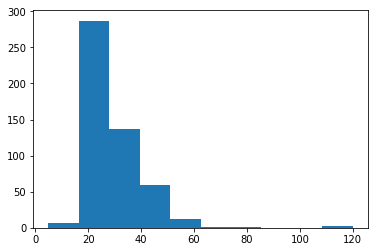

In [6]:
plt.hist(df["1、您的年龄？"])
plt.show()

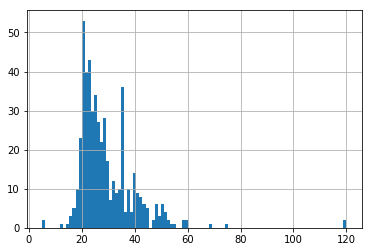

In [7]:
df["1、您的年龄？"].hist(bins=100)

In [8]:
df["score"] = df.iloc[:, -18:].sum(1)

In [9]:
df.iloc[:, 9:13]

,4、您第一针接种的疫苗是？,5、您第二针接种的疫苗是？,6、您第三针接种的疫苗是？,7、您第四针接种的疫苗是？
0,2,2,2,2
1,2,3,2,6
2,-3,-3,-3,-3
3,1,2,2,6
4,2,2,2,6
5,1,1,1,6
6,2,2,2,6
7,2,2,2,6
8,1,2,2,6
9,2,2,6,6


- 1 国药
- 2 科兴
- 3 智飞生物
- 4 康希诺
- 5 其他（辉瑞）
- 6 未接种

## 三针国药和三针科兴

In [10]:
guoyao = df[(df["4、您第一针接种的疫苗是？"] == 1) & 
            (df["5、您第二针接种的疫苗是？"] == 1) & 
            (df["6、您第三针接种的疫苗是？"] == 1) &
            (df["7、您第四针接种的疫苗是？"] == 6)]
guoyao.shape

(69, 32)

In [11]:
kexing = df[(df["4、您第一针接种的疫苗是？"] == 2) & 
            (df["5、您第二针接种的疫苗是？"] == 2) & 
            (df["6、您第三针接种的疫苗是？"] == 2) &
            (df["7、您第四针接种的疫苗是？"] == 6)]

In [12]:
kexing.shape

(94, 32)

In [13]:
ttest_ind(guoyao["score"], kexing["score"])

Ttest_indResult(statistic=-0.8431758726590546, pvalue=0.40038102552153787)

In [14]:
guoyao["score"].shape

(69,)

In [15]:
guoyao["score"].mean()

7.956521739130435

In [16]:
kexing["score"].mean()

8.446808510638299

In [17]:
guoyao["8、(嗅觉失常)"].sum() / guoyao.shape[0]

0.2608695652173913

In [18]:
guoyao["8、(失去味觉)"].sum() / guoyao.shape[0]

0.2463768115942029

In [19]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.26595744680851063

In [20]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.23404255319148937

## 前两针国药和前两针科兴

In [21]:
guoyao = df[(df["4、您第一针接种的疫苗是？"] == 1) & 
            (df["5、您第二针接种的疫苗是？"] == 1)]
print(guoyao.shape)
guoyao["score"].mean()

(108, 32)


7.592592592592593

In [22]:
kexing = df[(df["4、您第一针接种的疫苗是？"] == 2) & 
            (df["5、您第二针接种的疫苗是？"] == 2)]
print(kexing.shape)
kexing["score"].mean()

(170, 32)


7.952941176470588

In [23]:
ttest_ind(guoyao["score"], kexing["score"])

Ttest_indResult(statistic=-0.7947106456057428, pvalue=0.42746466735373645)

In [24]:
guoyao["8、(嗅觉失常)"].sum() / guoyao.shape[0]

0.2037037037037037

In [25]:
guoyao["8、(失去味觉)"].sum() / guoyao.shape[0]

0.2222222222222222

In [26]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.24705882352941178

In [27]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.19411764705882353

## 第三针国药VS第三针科兴

In [28]:
guoyao = df[(df["6、您第三针接种的疫苗是？"] == 1)]
print(guoyao.shape)
guoyao["score"].mean()

(118, 32)


7.838983050847458

In [29]:
kexing = df[(df["6、您第三针接种的疫苗是？"] == 2)]
print(kexing.shape)
kexing["score"].mean()

(133, 32)


8.285714285714286

In [30]:
ttest_ind(guoyao["score"], kexing["score"])

Ttest_indResult(statistic=-0.9317299123678198, pvalue=0.3523786309161079)

In [31]:
guoyao["8、(嗅觉失常)"].sum() / guoyao.shape[0]

0.23728813559322035

In [32]:
guoyao["8、(失去味觉)"].sum() / guoyao.shape[0]

0.22033898305084745

In [33]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.2631578947368421

In [34]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.24060150375939848

## 没打疫苗VS打了疫苗

In [35]:
novaccine = df[df["3、你是否接种了新冠疫苗？（如北京生物，北京科兴的疫苗）"] == 2]
novaccine.shape

(112, 32)

In [36]:
novaccine["score"].mean()

4.5625

In [37]:
havevaccine = df[df["3、你是否接种了新冠疫苗？（如北京生物，北京科兴的疫苗）"] == 1]
havevaccine.shape

(394, 32)

In [38]:
havevaccine["score"].mean()

7.873096446700508

In [39]:
ttest_ind(novaccine["score"], havevaccine["score"])

Ttest_indResult(statistic=-8.49768899463273, pvalue=2.1963474880020534e-16)

## 打过国外疫苗VS第三针科兴

In [40]:
fv = df[(df["4、您第一针接种的疫苗是？"] == 5) | (df["5、您第二针接种的疫苗是？"] == 5) | (df["6、您第三针接种的疫苗是？"] == 5) | (df["7、您第四针接种的疫苗是？"] == 5)]
fv.shape

(21, 32)

In [41]:
fv["score"].mean()

6.809523809523809

In [42]:
ttest_ind(fv["score"], kexing["score"])

Ttest_indResult(statistic=-1.5959979207199855, pvalue=0.11256628219656205)

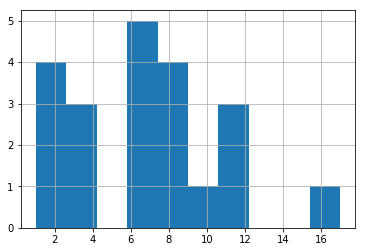

In [43]:
fv["score"].hist()

## 打过国外疫苗VS三针科兴

In [44]:
kexing = df[(df["4、您第一针接种的疫苗是？"] == 2) & 
            (df["5、您第二针接种的疫苗是？"] == 2) & 
            (df["6、您第三针接种的疫苗是？"] == 2) &
            (df["7、您第四针接种的疫苗是？"] == 6)]
kexing["score"].mean()

8.446808510638299

In [45]:
ttest_ind(fv["score"], kexing["score"])

Ttest_indResult(statistic=-1.8277525735517737, pvalue=0.07022510929035103)

In [46]:
havedis = df[df["2、您是否有基础疾病（如糖尿病，心脏病，艾滋病，高血压，支气管炎，胃炎，结核，肿瘤等）？"] == 1]
havedis.shape

(54, 32)

In [47]:
havedis["score"].mean()

6.7592592592592595

In [48]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.26595744680851063

In [49]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.23404255319148937

In [50]:
fv["8、(嗅觉失常)"].sum() / fv.shape[0]

0.14285714285714285

In [51]:
fv["8、(失去味觉)"].sum() / fv.shape[0]

0.14285714285714285

## 有基础疾病的三针国药VS三针科兴

In [52]:
guoyao = havedis[(havedis["4、您第一针接种的疫苗是？"] == 1) & 
               (havedis["5、您第二针接种的疫苗是？"] == 1) & 
               (havedis["6、您第三针接种的疫苗是？"] == 1) &
               (havedis["7、您第四针接种的疫苗是？"] == 6)]
guoyao.shape

(8, 32)

In [53]:
kexing = havedis[(havedis["4、您第一针接种的疫苗是？"] == 2) & 
               (havedis["5、您第二针接种的疫苗是？"] == 2) & 
               (havedis["6、您第三针接种的疫苗是？"] == 2) &
               (havedis["7、您第四针接种的疫苗是？"] == 6)]
kexing.shape

(5, 32)

In [54]:
guoyao["score"].mean()

5.0

In [55]:
kexing["score"].mean()

9.2

In [56]:
ttest_ind(guoyao["score"], kexing["score"])

Ttest_indResult(statistic=-1.8273435105713587, pvalue=0.09487741671833522)

In [57]:
guoyao["8、(嗅觉失常)"].sum() / guoyao.shape[0]

0.0

In [58]:
guoyao["8、(失去味觉)"].sum() / guoyao.shape[0]

0.125

In [59]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.2

In [60]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.4

## 有基础疾病的第三针国药VS第三针科兴

In [61]:
guoyao = havedis[(havedis["6、您第三针接种的疫苗是？"] == 1)]
print(guoyao.shape)
guoyao["score"].mean()

(13, 32)


7.0

In [62]:
kexing = havedis[(havedis["6、您第三针接种的疫苗是？"] == 2)]
print(kexing.shape)
kexing["score"].mean()

(11, 32)


9.454545454545455

In [63]:
guoyao["8、(嗅觉失常)"].sum() / guoyao.shape[0]

0.15384615384615385

In [64]:
guoyao["8、(失去味觉)"].sum() / guoyao.shape[0]

0.23076923076923078

In [65]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.36363636363636365

In [66]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.45454545454545453

In [67]:
ttest_ind(guoyao["score"], kexing["score"])

Ttest_indResult(statistic=-1.295269492845476, pvalue=0.20865502907975708)

In [68]:
nodis = df[df["2、您是否有基础疾病（如糖尿病，心脏病，艾滋病，高血压，支气管炎，胃炎，结核，肿瘤等）？"] == 2]
nodis.shape

(452, 32)

In [69]:
nodis["score"].mean()

7.185840707964601

## 无基础疾病的三针国药VS三针科兴

In [70]:
guoyao = nodis[(nodis["4、您第一针接种的疫苗是？"] == 1) & 
               (nodis["5、您第二针接种的疫苗是？"] == 1) & 
               (nodis["6、您第三针接种的疫苗是？"] == 1) &
               (nodis["7、您第四针接种的疫苗是？"] == 6)]
guoyao.shape

(61, 32)

In [71]:
kexing = nodis[(nodis["4、您第一针接种的疫苗是？"] == 2) & 
               (nodis["5、您第二针接种的疫苗是？"] == 2) & 
               (nodis["6、您第三针接种的疫苗是？"] == 2) &
               (nodis["7、您第四针接种的疫苗是？"] == 6)]
kexing.shape

(89, 32)

In [72]:
guoyao["8、(嗅觉失常)"].sum() / guoyao.shape[0]

0.29508196721311475

In [73]:
guoyao["8、(失去味觉)"].sum() / guoyao.shape[0]

0.26229508196721313

In [74]:
kexing["8、(嗅觉失常)"].sum() / kexing.shape[0]

0.2696629213483146

In [75]:
kexing["8、(失去味觉)"].sum() / kexing.shape[0]

0.2247191011235955

In [76]:
guoyao["score"].mean()

8.344262295081966

In [77]:
kexing["score"].mean()

8.404494382022472

In [78]:
ttest_ind(guoyao["score"], kexing["score"])

Ttest_indResult(statistic=-0.10099544397233381, pvalue=0.9196907679025769)

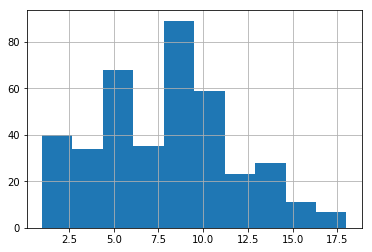

In [79]:
havevaccine["score"].hist()

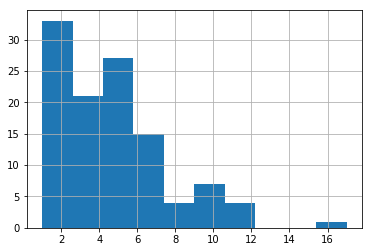

In [80]:
novaccine["score"].hist()

## 两针VS三针

In [81]:
v2 = havevaccine[((havevaccine["4、您第一针接种的疫苗是？"] == 1) | 
                 (havevaccine["4、您第一针接种的疫苗是？"] == 2) |
                (havevaccine["4、您第一针接种的疫苗是？"] == 3) |
                (havevaccine["4、您第一针接种的疫苗是？"] == 4) |
                  (havevaccine["4、您第一针接种的疫苗是？"] == 5)) &
                 ((havevaccine["5、您第二针接种的疫苗是？"] == 1) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 2) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 3) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 4) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 5)) &
                (havevaccine["6、您第三针接种的疫苗是？"] == 6)]
v2.shape

(80, 32)

In [82]:
v2["score"].mean()

8.0375

In [83]:
v3 = havevaccine[((havevaccine["4、您第一针接种的疫苗是？"] == 1) | 
                 (havevaccine["4、您第一针接种的疫苗是？"] == 2) |
                 (havevaccine["4、您第一针接种的疫苗是？"] == 3) |
                 (havevaccine["4、您第一针接种的疫苗是？"] == 4) |
                 (havevaccine["4、您第一针接种的疫苗是？"] == 5)) &
                 ((havevaccine["5、您第二针接种的疫苗是？"] == 1) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 2) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 3) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 4) |
                 (havevaccine["5、您第二针接种的疫苗是？"] == 5)) &
                ((havevaccine["6、您第三针接种的疫苗是？"] == 1) |
                (havevaccine["6、您第三针接种的疫苗是？"] == 2) |
                (havevaccine["6、您第三针接种的疫苗是？"] == 3)|
                (havevaccine["6、您第三针接种的疫苗是？"] == 4)|
                (havevaccine["6、您第三针接种的疫苗是？"] == 5)) &
                (havevaccine["7、您第四针接种的疫苗是？"] == 6)]
v3.shape

(271, 32)

In [84]:
v3["score"].mean()

7.918819188191882

In [85]:
ttest_ind(v2["score"], v3["score"])

Ttest_indResult(statistic=0.25317041666793916, pvalue=0.8002855878226043)

## 一针VS三针

In [86]:
v1 = havevaccine[((havevaccine["4、您第一针接种的疫苗是？"] == 1) | 
                 (havevaccine["4、您第一针接种的疫苗是？"] == 2) |
                 (havevaccine["4、您第一针接种的疫苗是？"] == 3) |
                 (havevaccine["4、您第一针接种的疫苗是？"] == 4)) &
                (havevaccine["5、您第二针接种的疫苗是？"] == 6)]
v1.shape

(20, 32)

In [87]:
v1["score"].mean()

7.2

In [88]:
v1["score"]

33      3
118     2
122     7
125     6
153    10
185     8
192    15
228     8
245     8
252     9
260     6
313    13
316     1
334     1
356     9
374     5
377     9
409     5
450     8
486    11
Name: score, dtype: int64

In [89]:
ttest_ind(v2["score"], v1["score"])

Ttest_indResult(statistic=0.9134519855763823, pvalue=0.3632467176057578)

In [90]:
ttest_ind(v3["score"], v1["score"])

Ttest_indResult(statistic=0.8396058191837208, pvalue=0.4018234388765348)

In [91]:
ttest_ind(novaccine["score"], v1["score"])

Ttest_indResult(statistic=-3.4944158073955385, pvalue=0.0006501720037701126)

## 有基础疾病VS无基础疾病

In [92]:
havedis["score"].mean()

6.7592592592592595

In [93]:
nodis["score"].mean()

7.185840707964601

In [94]:
ttest_ind(nodis["score"], havedis["score"])

Ttest_indResult(statistic=0.7620442383390852, pvalue=0.44639005918189445)

## 嗅觉和味觉失常比例

In [95]:
novaccine["8、(失去味觉)"].sum() / novaccine.shape[0]

0.07142857142857142

In [96]:
novaccine["8、(嗅觉失常)"].sum() / novaccine.shape[0]

0.05357142857142857

In [97]:
v2["8、(失去味觉)"].sum() / v2.shape[0]

0.2375

In [98]:
v2["8、(嗅觉失常)"].sum() / v2.shape[0]

0.2375

In [99]:
v3["8、(失去味觉)"].sum() / v3.shape[0]

0.22140221402214022

In [100]:
v3["8、(嗅觉失常)"].sum() / v3.shape[0]

0.24354243542435425

In [101]:
havevaccine["8、(失去味觉)"].sum() / havevaccine.shape[0]

0.22081218274111675

In [102]:
havevaccine["8、(嗅觉失常)"].sum() / havevaccine.shape[0]

0.2436548223350254

In [103]:
havedis["8、(失去味觉)"].sum() / havedis.shape[0]

0.2037037037037037

In [104]:
havedis["8、(嗅觉失常)"].sum() / havedis.shape[0]

0.14814814814814814

In [105]:
nodis["8、(失去味觉)"].sum() / nodis.shape[0]

0.18584070796460178

In [106]:
nodis["8、(嗅觉失常)"].sum() / nodis.shape[0]

0.2079646017699115

## 智飞生物 VS 三针科兴

In [107]:
zfsw = df[(df["4、您第一针接种的疫苗是？"] == 3) & 
          (df["5、您第二针接种的疫苗是？"] == 3) &
          (df["6、您第三针接种的疫苗是？"] == 3)]

In [108]:
zfsw.shape

(11, 32)

In [109]:
zfsw["score"].mean()

6.363636363636363

In [110]:
ttest_ind(zfsw["score"], kexing["score"])

Ttest_indResult(statistic=-1.7399344970450874, pvalue=0.08500985615617178)

In [111]:
zfsw["8、(失去味觉)"].sum() / zfsw.shape[0]

0.18181818181818182

In [112]:
zfsw = df[df["6、您第三针接种的疫苗是？"] == 3]
zfsw.shape

(21, 32)

In [113]:
zfsw["score"].mean()

7.0476190476190474

In [114]:
ttest_ind(zfsw["score"], kexing["score"])

Ttest_indResult(statistic=-1.535781405568255, pvalue=0.12751650813705734)

In [115]:
zfsw["8、(失去味觉)"].sum() / zfsw.shape[0]

0.19047619047619047

## 康希诺 VS 三针科兴

In [116]:
kxn = df[(df["4、您第一针接种的疫苗是？"] == 4) | 
          (df["5、您第二针接种的疫苗是？"] == 4) |
          (df["6、您第三针接种的疫苗是？"] == 4) |
         (df["7、您第四针接种的疫苗是？"] == 4)]
kxn.shape

(17, 32)

In [117]:
kxn["score"].mean()

5.882352941176471

In [118]:
kxn["8、(失去味觉)"].sum() / kxn.shape[0]

0.11764705882352941

In [119]:
ttest_ind(kxn["score"], kexing["score"])

Ttest_indResult(statistic=-2.592287221771624, pvalue=0.010905191168998758)

In [120]:
ttest_ind(kxn["score"], zfsw["score"])

Ttest_indResult(statistic=-0.8532992743502973, pvalue=0.3991354273575419)

In [121]:
ttest_ind(kxn["score"], fv["score"])

Ttest_indResult(statistic=-0.6682853014507251, pvalue=0.5082139489806169)

## 三针国外疫苗 VS 三针科兴

In [122]:
fv = df[(df["4、您第一针接种的疫苗是？"] == 5) & 
        (df["5、您第二针接种的疫苗是？"] == 5) &
        (df["6、您第三针接种的疫苗是？"] == 5)] #| (df["7、您第四针接种的疫苗是？"] == 5)]
fv.shape

(2, 32)

In [123]:
fv["score"]

61     1
366    8
Name: score, dtype: int64

In [124]:
fv["score"].mean()

4.5

In [125]:
ttest_ind(fv["score"], kexing["score"])

Ttest_indResult(statistic=-1.5339332362867673, pvalue=0.12859338271210732)

## 第三针国外疫苗 VS 三针科兴

In [126]:
fv = df[df["6、您第三针接种的疫苗是？"] == 5] #| (df["7、您第四针接种的疫苗是？"] == 5)]
fv.shape

(17, 32)

In [127]:
fv["score"].mean()

6.705882352941177

In [128]:
ttest_ind(fv["score"], kexing["score"])

Ttest_indResult(statistic=-1.74849078739113, pvalue=0.08332982301421404)